# Init

In [3]:
import pandas as pd
import pythermalcomfort as ptc
import seaborn as sns
import scipy as scp

In [8]:
# loading excel data into dataframe variable
data_master = pd.read_excel("../0_dataset_master/Experiment_edited_V4.xlsx")
data_master

,Unnamed: 0,No,Start Date,End Date,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,...,Frustration,ThermalSensation,ThermalAcceptability,NoiseAnnoyance,AcousticSatisfaction,UnsatisfiedNoiseSource,UnsatisfiedNoiseSource - other,ThermalSatisfaction,TotalSatisfaction,SET
0,0,1,2023-07-10 10:18:12,2023-07-10 11:02:50,129.126.10.3,100,2677,True,2023-07-10 11:02:50,R_1QKIHfH2SzDYww5,...,4,2,3,2,4,NaN,NaN,6,4,26.5
1,1,2,2023-07-10 09:07:40,2023-07-10 11:03:41,129.126.10.6,100,6961,True,2023-07-10 11:03:42,R_3oZ1X5rJydNMWKi,...,7,4,4,1,6,NaN,NaN,6,6,26.5
2,2,3,2023-07-10 09:09:15,2023-07-10 11:03:52,129.126.10.8,100,6877,True,2023-07-10 11:03:53,R_3nvGWRYoFKSgygt,...,4,3,4,2,5,NaN,NaN,6,6,25.5
3,3,4,2023-07-10 10:18:07,2023-07-10 11:04:08,119.234.4.134,100,2761,True,2023-07-10 11:04:09,R_2U4WrS8qQBMNLbH,...,10,3,3,4,2,Other,Mouse clicking from the neighbouring table,5,3,25.8
4,4,5,2023-07-10 10:45:42,2023-07-10 11:05:05,119.56.107.228,100,1163,True,2023-07-10 11:05:06,R_2EhPoNBA5xgmC4D,...,9,3,3,5,1,Equipment noise,NaN,5,1,26.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,301,477,2023-07-27 16:10:30,2023-07-27 16:27:35,119.56.99.96,100,1024,True,2023-07-27 16:27:35,R_2ttfFxeZl0jOvVq,...,7,5,3,3,3,Traffic noise,NaN,2,2,28.2
302,302,478,2023-07-27 15:47:28,2023-07-27 16:27:57,129.126.10.8,100,2428,True,2023-07-27 16:27:57,R_1dazsRpvRJKcZz8,...,7,6,2,2,5,NaN,NaN,2,3,28.8
303,303,479,2023-07-27 16:08:19,2023-07-27 16:28:20,129.126.10.14,100,1201,True,2023-07-27 16:28:20,R_2sXaFvpM2YYBSMn,...,7,5,3,2,3,Traffic noise,NaN,5,4,28.3
304,304,480,2023-07-27 15:38:12,2023-07-27 16:31:11,129.126.10.0,100,3178,True,2023-07-27 16:31:11,R_3Pd7YJJd4vSJ70N,...,2,5,2,2,3,Traffic noise,NaN,3,3,28.7


# Percentage Plot

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

c:\Users\ZENI\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:894: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = float(self.convert_xunits(self._x))
c:\Users\ZENI\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:894: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = float(self.convert_xunits(self._x))
c:\Users\ZENI\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:894: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this o

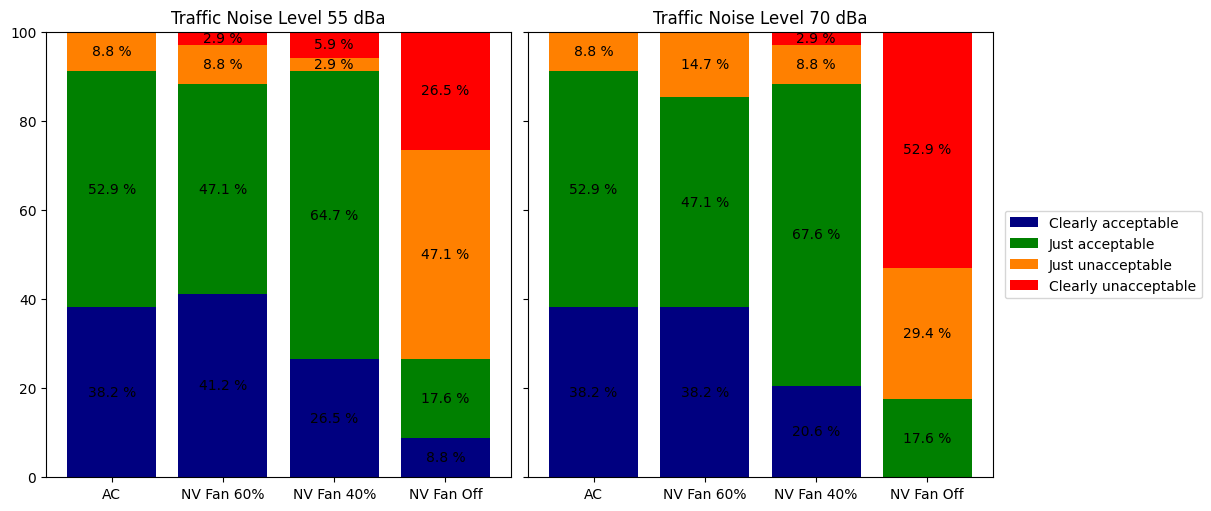

In [26]:
# Prepare the data
x = ['AC', 'NV fan 5', 'NV fan 3', 'NV fan 0']
x_labels = ['AC', 'NV Fan 60%', 'NV Fan 40%', 'NV Fan Off']
y = [4,3,2,1]
colors = [
    (0,0,0.5,1),
    (0,0.5,0,1),
    (1,0.5,0,1),
    (1,0,0,1),
]
labels = ['Clearly unacceptable', 'Just unacceptable', 'Just acceptable', 'Clearly acceptable']
tnl = [55,70]

data_y = {}

for tf in tnl:
    data_y[tf] = {}
    for item in y:
        for group in x:
            # print(tf, item, )
            data_slice = data_master[(data_master['ThermalAcceptability']==item) & (data_master['Traffic noise levels']==tf) & (data_master['Thermal'] == group)].copy()
            res = len(data_slice)

            if data_y[tf].get(item, None):
                data_y[tf][item].append(res)
            else:
                data_y[tf][item] = []
                data_y[tf][item].append(res)
        data_y[tf][item] = np.array(data_y[tf][item])

# memo of sample number
for tf in tnl:
    snum = data_y[tf][4]
    for item in y:
        snum = snum + data_y[tf][item]
    snum = snum - data_y[tf][4]
    for item in y:
        data_y[tf][item] = data_y[tf][item]/snum*100

# stack bars
fig, (ax1, ax2) = plt.subplots(1, 2, layout='constrained', sharey=True)
fig.set_figwidth(12)
fig.set_figheight(5)
ax1.set_title('Traffic Noise Level 55 dBa')
ax2.set_title('Traffic Noise Level 70 dBa')
plt.ylim(0,100)

for index, item in enumerate(y):
    data_y[55][list(data_y[55].keys())[index-1]]
    if index == 0:
        ax1.bar(x_labels, data_y[55][item], label=labels[item-1], color = colors[index])
        sbot = data_y[55][item]
        for xpos, ypos, yval in zip(x_labels, sbot/2, sbot):
            if yval > 0:
                ax1.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
    else:
        ax1.bar(x_labels, data_y[55][item], bottom=sbot, label=labels[item-1], color = colors[index])
        for xpos, ypos, yval in zip(x_labels, sbot+data_y[55][item]/2, data_y[55][item]):
            if yval > 0:
                ax1.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
        sbot += data_y[55][item]
        
# add text annotation corresponding to the "total" value of each bar
# for xpos, ypos, yval in zip(x, y1+y2+y3, snum):
#     plt.text(xpos, ypos, "N=%d"%yval, ha="center", va="bottom")


for index, item in enumerate(y):
    data_y[70][list(data_y[70].keys())[index-1]]
    if index == 0:
        ax2.bar(x_labels, data_y[70][item], label=labels[item-1], color = colors[index])
        sbot = data_y[70][item]
        for xpos, ypos, yval in zip(x_labels, sbot/2, sbot):
            if yval > 0:
                ax2.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
    else:
        ax2.bar(x_labels, data_y[70][item], bottom=sbot, label=labels[item-1], color = colors[index])
        for xpos, ypos, yval in zip(x_labels, sbot+data_y[70][item]/2, data_y[70][item]):
            if yval > 0:
                ax2.text(xpos, ypos, "%.1f"%yval+" %", ha="center", va="center")
        sbot += data_y[70][item]
plt.legend(bbox_to_anchor=(1.01,0.5), loc='center left')
plt.show()

# Plotting

## Plot 3A

In [36]:
# loading excel data into dataframe variable
data_master = pd.read_excel("../0_dataset_master/Experiment_edited_V4.xlsx")

In [37]:
data_final_plot3 = data_master[['Traffic noise levels', 'SET', 'ThermalSensation', 'Thermal']]
data_final_plot3['Thermal'] = pd.Categorical(data_final_plot3['Thermal'],["NV fan 0", "NV fan 3", "NV fan 5", "AC"])
data_final_plot3.sort_values('Thermal', inplace=True)
data_final_plot3.reset_index(inplace=True)
data_final_plot3['ThermalSensation'] = pd.Categorical(data_final_plot3['ThermalSensation'],[7, 6, 5, 4, 3, 2, 1])

C:\Users\ZENI\AppData\Local\Temp\ipykernel_2656\3336427276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final_plot3['Thermal'] = pd.Categorical(data_final_plot3['Thermal'],["NV fan 0", "NV fan 3", "NV fan 5", "AC"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_2656\3336427276.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final_plot3.sort_values('Thermal', inplace=True)
C:\Users\ZENI\AppData\Local\Temp\ipykernel_2656\3336427276.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

c:\Users\ZENI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ZENI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ZENI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\ZENI\AppData\Local\Programs\Python\Python310\l

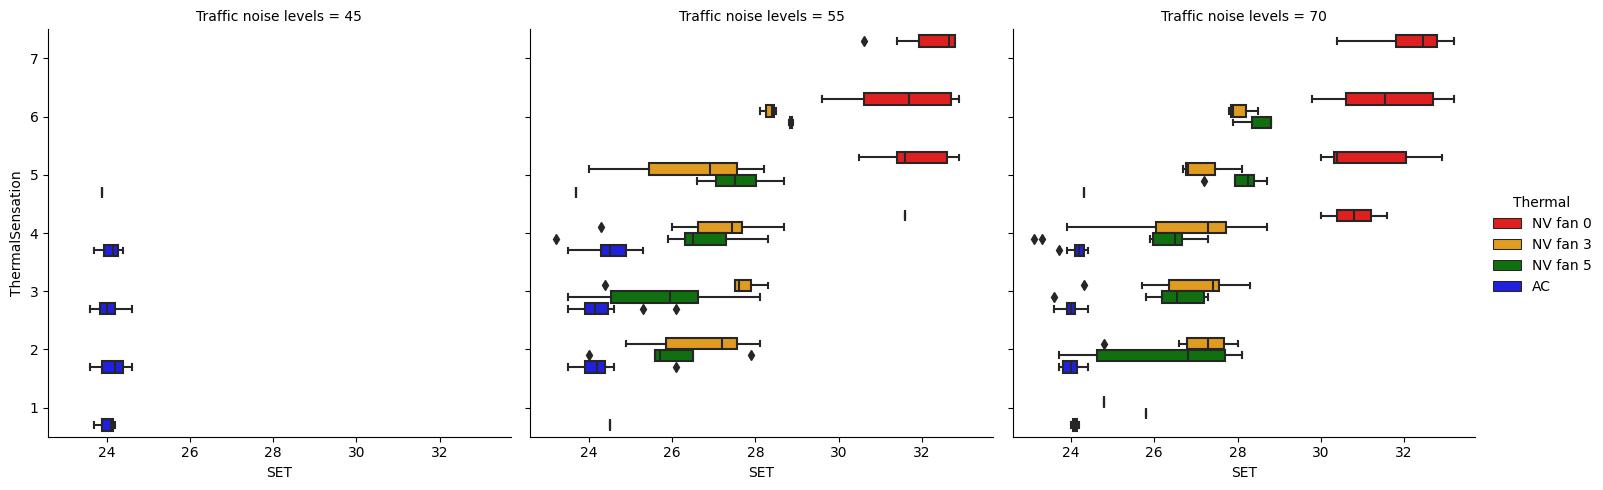

In [38]:
sns.catplot(
    data=data_final_plot3, 
    x='SET', 
    y='ThermalSensation',
    hue='Thermal',
    col='Traffic noise levels', kind='box', col_wrap=3,
    palette=sns.color_palette(['red','orange','green','blue']),
)

## Plot 3B

In [39]:
sb_y = ["Rotation_max", "SpatialSpan_max", "DoubleTrouble_max", "FeatureMatch_max"]
data_final_plot3b = data_master[['Traffic noise levels', 'SET', 'Thermal']+sb_y]
data_final_plot3b['Thermal'] = pd.Categorical(data_final_plot3b['Thermal'],["NV fan 0", "NV fan 3", "NV fan 5", "AC"])
data_final_plot3b.sort_values('Thermal', inplace=True)
data_final_plot3b.reset_index(inplace=True)

C:\Users\ZENI\AppData\Local\Temp\ipykernel_2656\3841677750.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final_plot3b['Thermal'] = pd.Categorical(data_final_plot3b['Thermal'],["NV fan 0", "NV fan 3", "NV fan 5", "AC"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_2656\3841677750.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final_plot3b.sort_values('Thermal', inplace=True)


c:\Users\ZENI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ZENI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ZENI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ZENI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

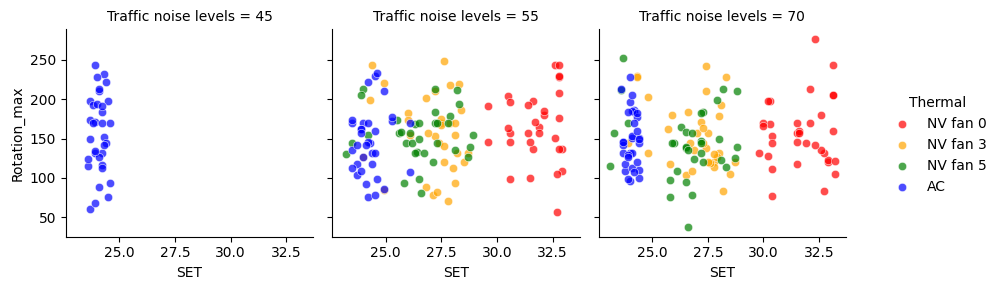

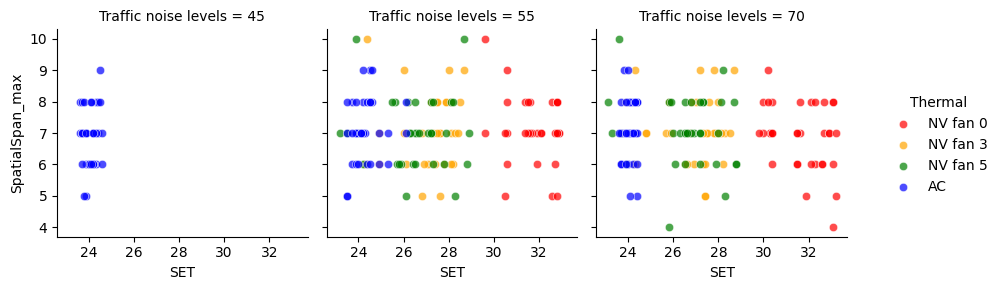

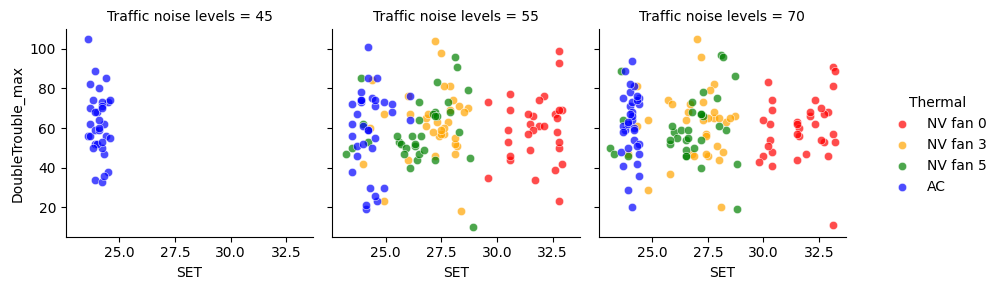

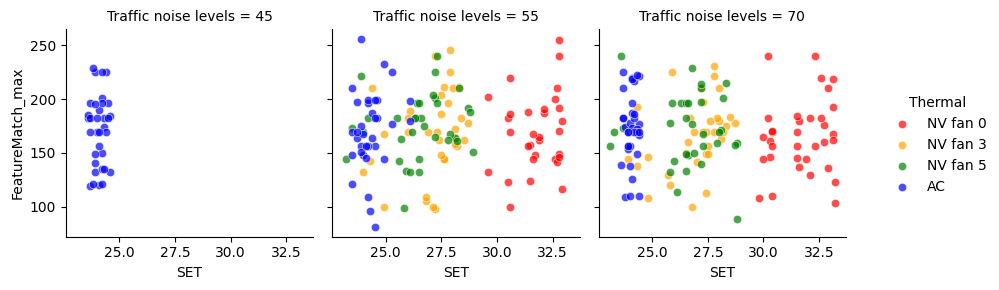

In [41]:
for item in sb_y:
    ordered_col = data_final_plot3b['Traffic noise levels'].value_counts().index.sort_values()
    g = sns.FacetGrid(data_final_plot3b, col="Traffic noise levels", hue="Thermal", margin_titles=True, col_order=ordered_col, palette=sns.color_palette(['red','orange','green','blue']))
    g.map(sns.scatterplot, "SET", item, alpha=.7)
    g.add_legend()

## Plot 4b

In [43]:
sb_y = ["Rotation_max", "SpatialSpan_max", "DoubleTrouble_max", "FeatureMatch_max"]
data_final_plot4b = data_master[['Traffic noise levels', 'Thermal']+sb_y]
data_final_plot4b['Thermal'] = pd.Categorical(data_final_plot4b['Thermal'],["NV fan 0", "NV fan 3", "NV fan 5", "AC"])
data_final_plot4b.sort_values('Thermal', inplace=True)
data_final_plot4b.reset_index(inplace=True)

C:\Users\ZENI\AppData\Local\Temp\ipykernel_2656\3529878955.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final_plot4b['Thermal'] = pd.Categorical(data_final_plot4b['Thermal'],["NV fan 0", "NV fan 3", "NV fan 5", "AC"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_2656\3529878955.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final_plot4b.sort_values('Thermal', inplace=True)


c:\Users\ZENI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ZENI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ZENI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\ZENI\AppData\Local\Programs\Python\Python310\l

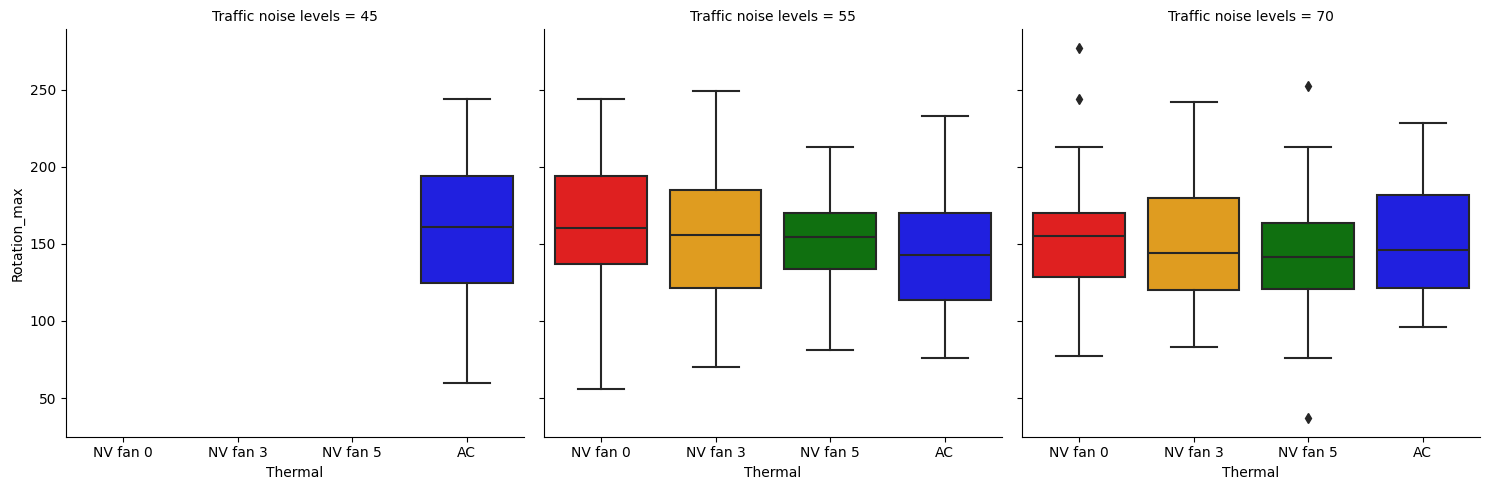

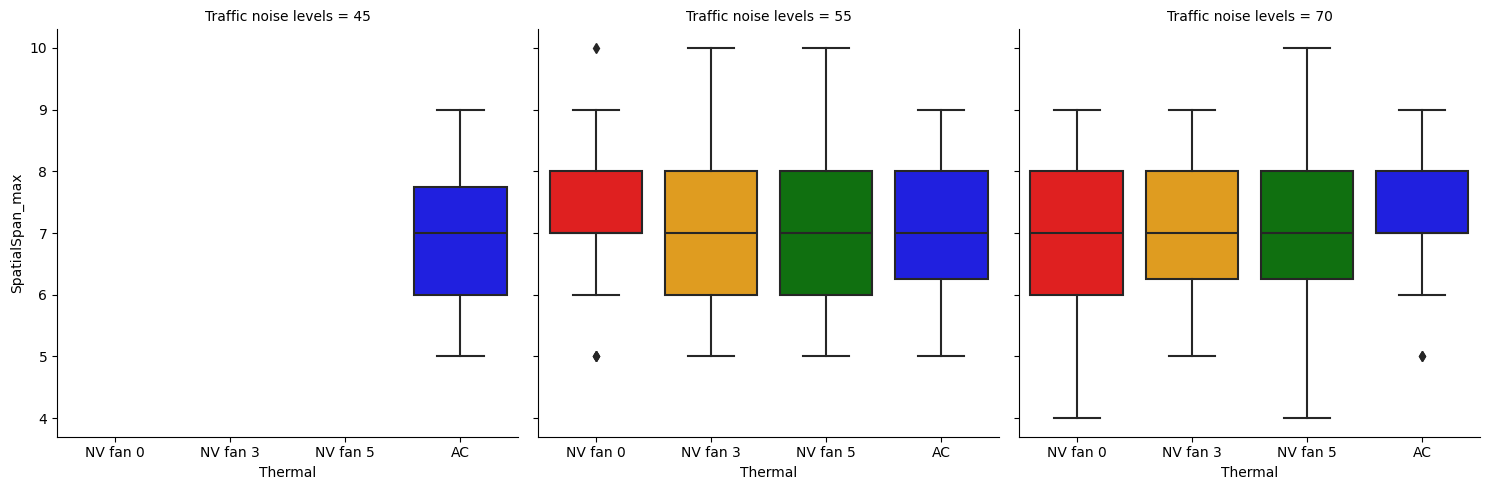

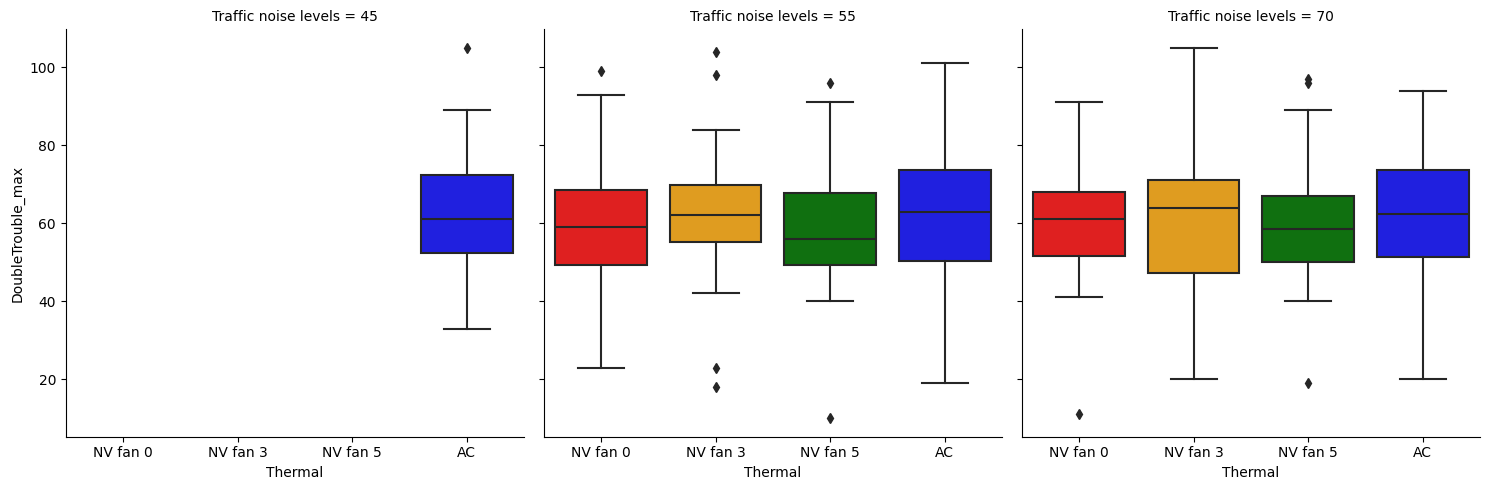

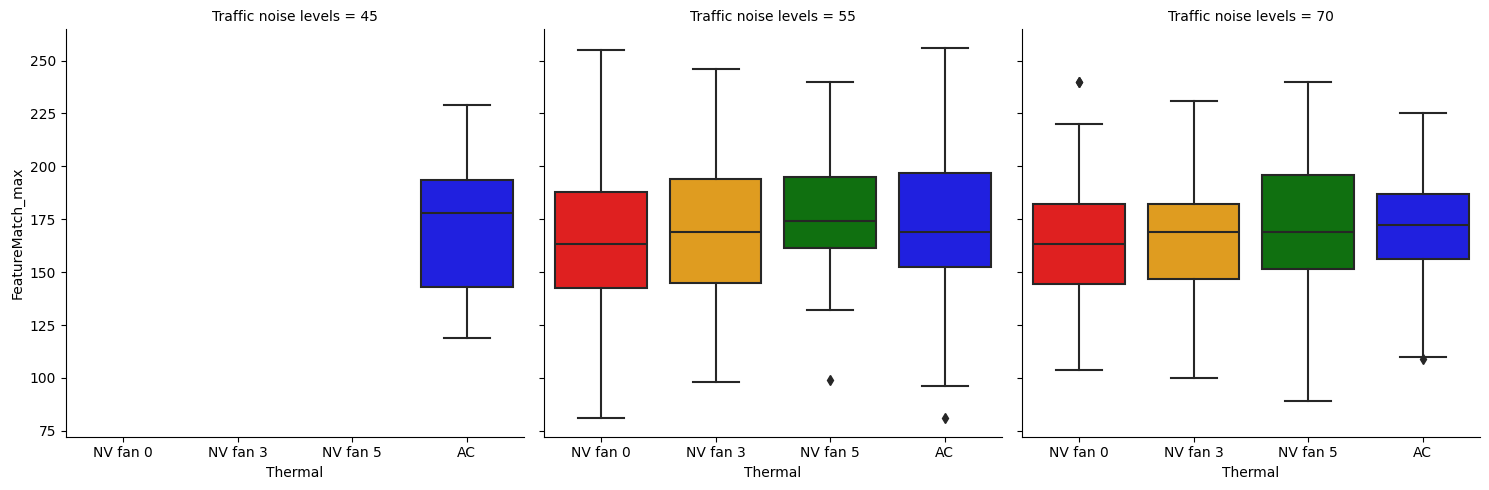

In [44]:
for item in sb_y:
    sns.catplot(
        data=data_final_plot4b, 
        x='Thermal', 
        y=item,
        col='Traffic noise levels', kind='box', col_wrap=3,
        palette=sns.color_palette(['red','orange','green','blue']),
    )

## Plot 5

In [45]:
sb_y = ["Rotation_max", "SpatialSpan_max", "DoubleTrouble_max", "FeatureMatch_max"]
data_final_plot5 = data_master[['Experiment set', 'Experiment id', 'Thermal', 'Traffic noise levels']+sb_y]
data_final_plot5.head()
data_final_plot5['Thermal'] = pd.Categorical(data_final_plot5['Thermal'],["NV fan 0", "NV fan 3", "NV fan 5", "AC"])
data_final_plot5.sort_values('Thermal', inplace=True)

C:\Users\ZENI\AppData\Local\Temp\ipykernel_2656\130532557.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final_plot5['Thermal'] = pd.Categorical(data_final_plot5['Thermal'],["NV fan 0", "NV fan 3", "NV fan 5", "AC"])
C:\Users\ZENI\AppData\Local\Temp\ipykernel_2656\130532557.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final_plot5.sort_values('Thermal', inplace=True)


c:\Users\ZENI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ZENI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ZENI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ZENI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

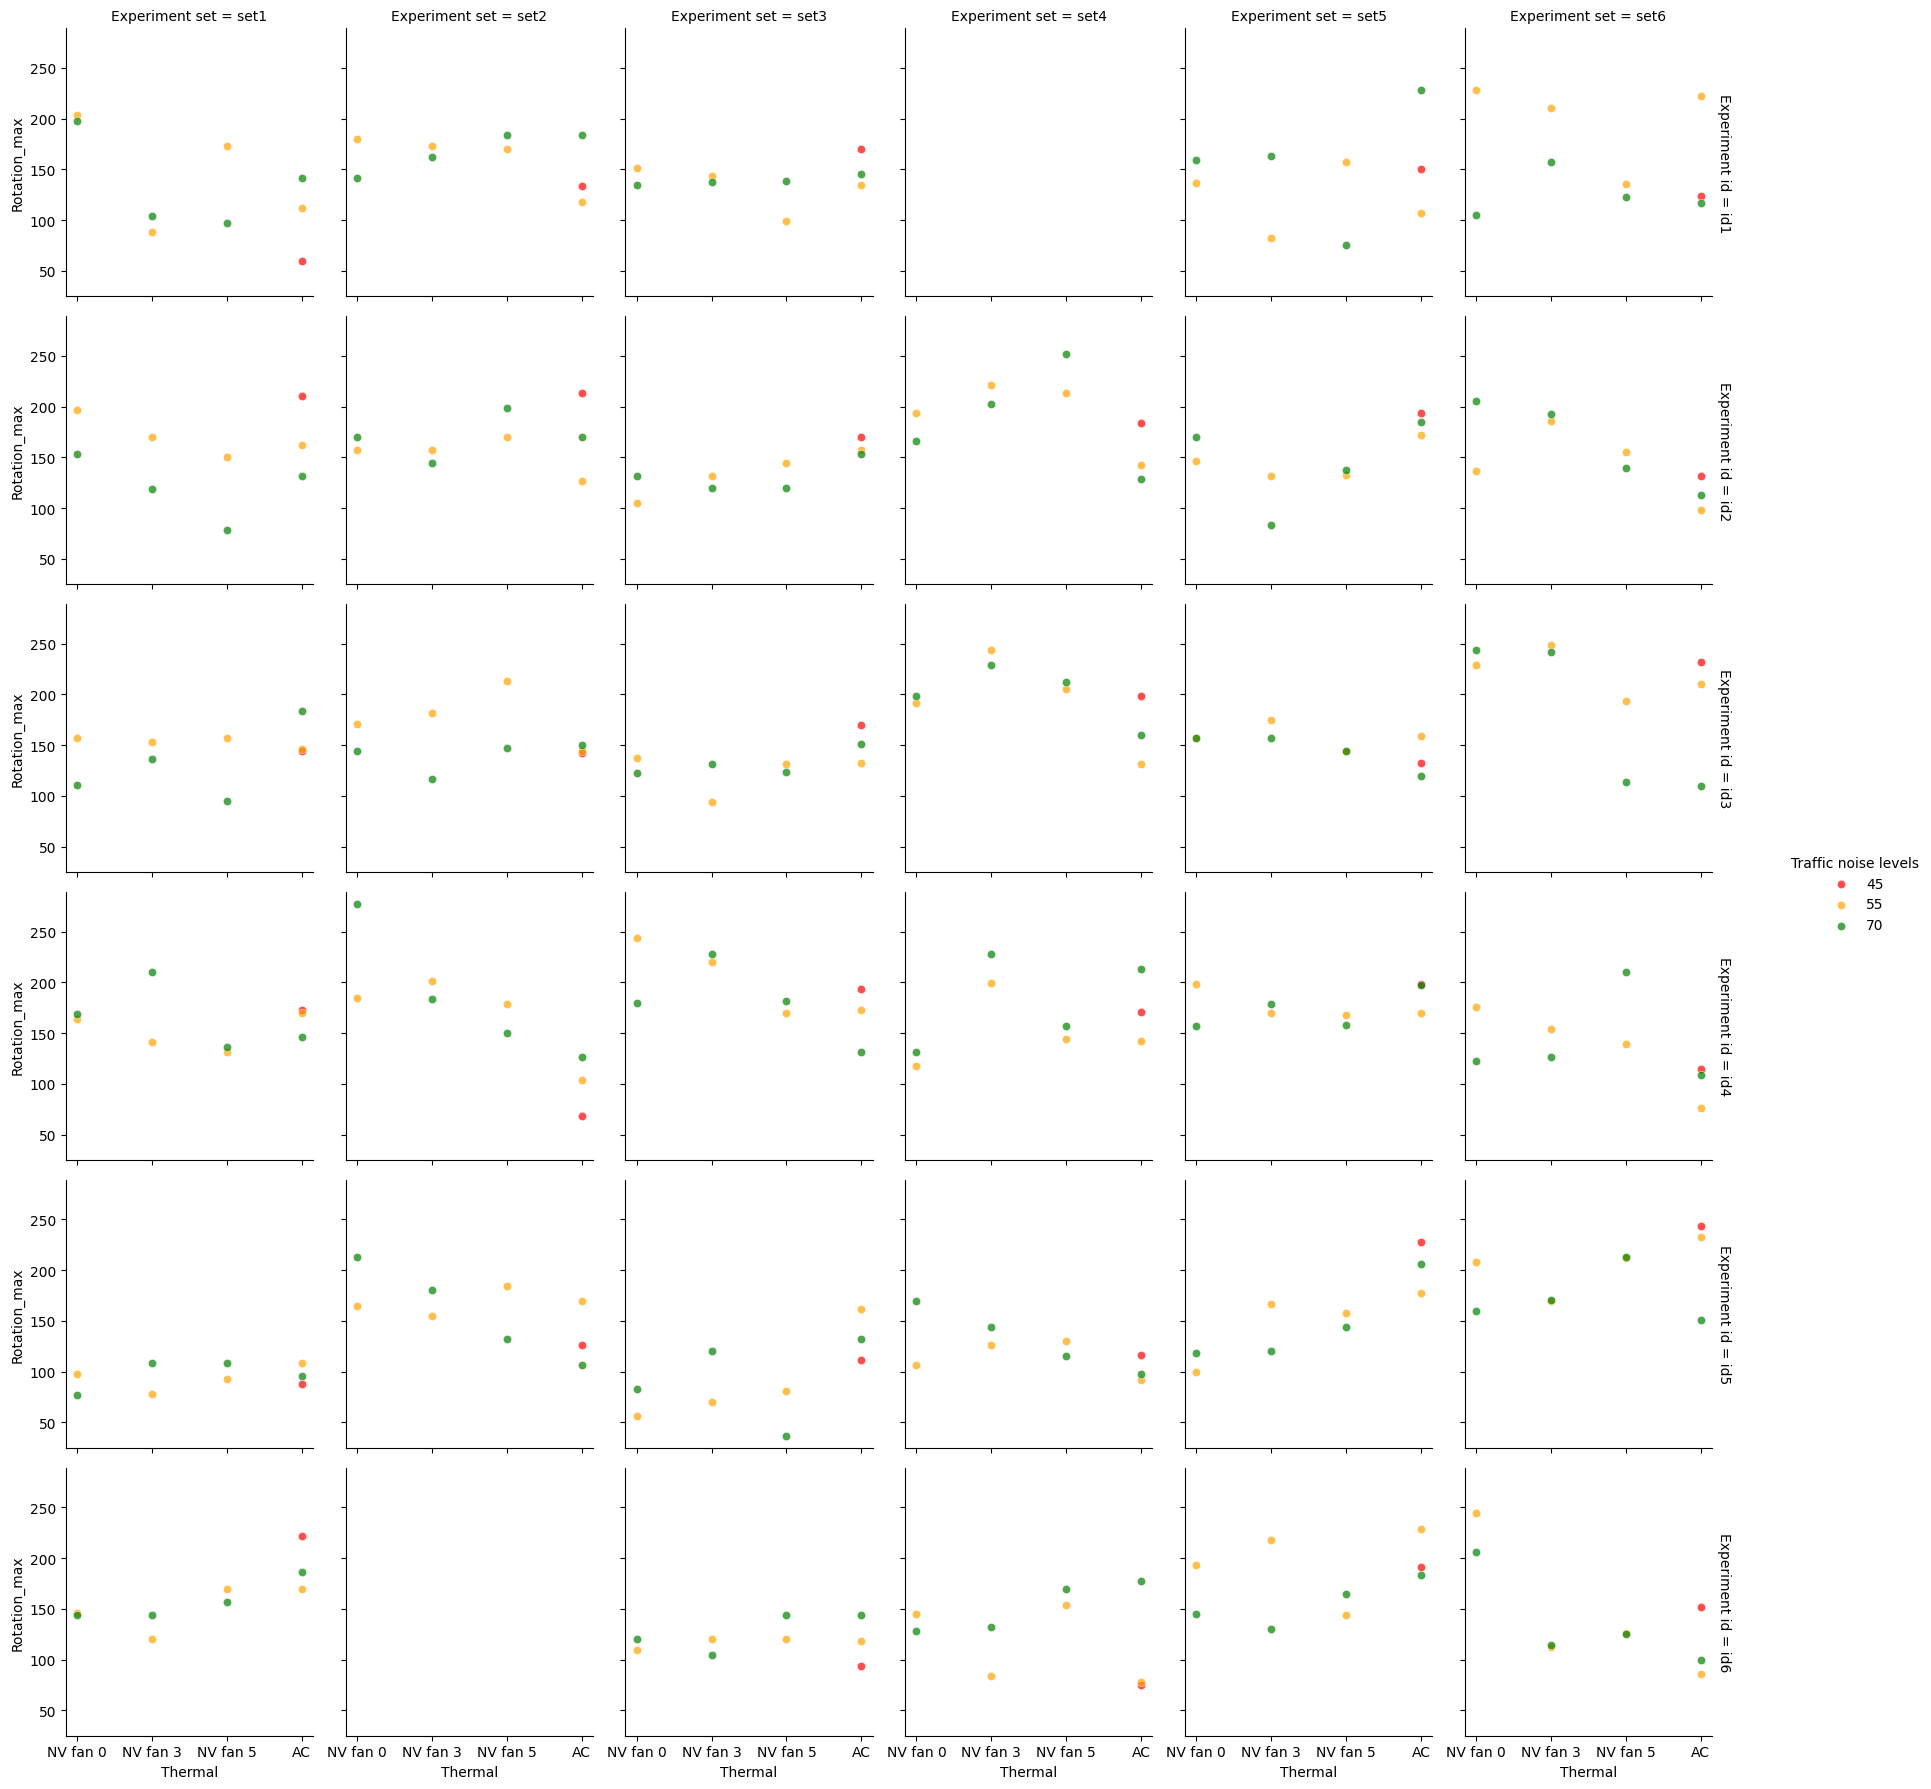

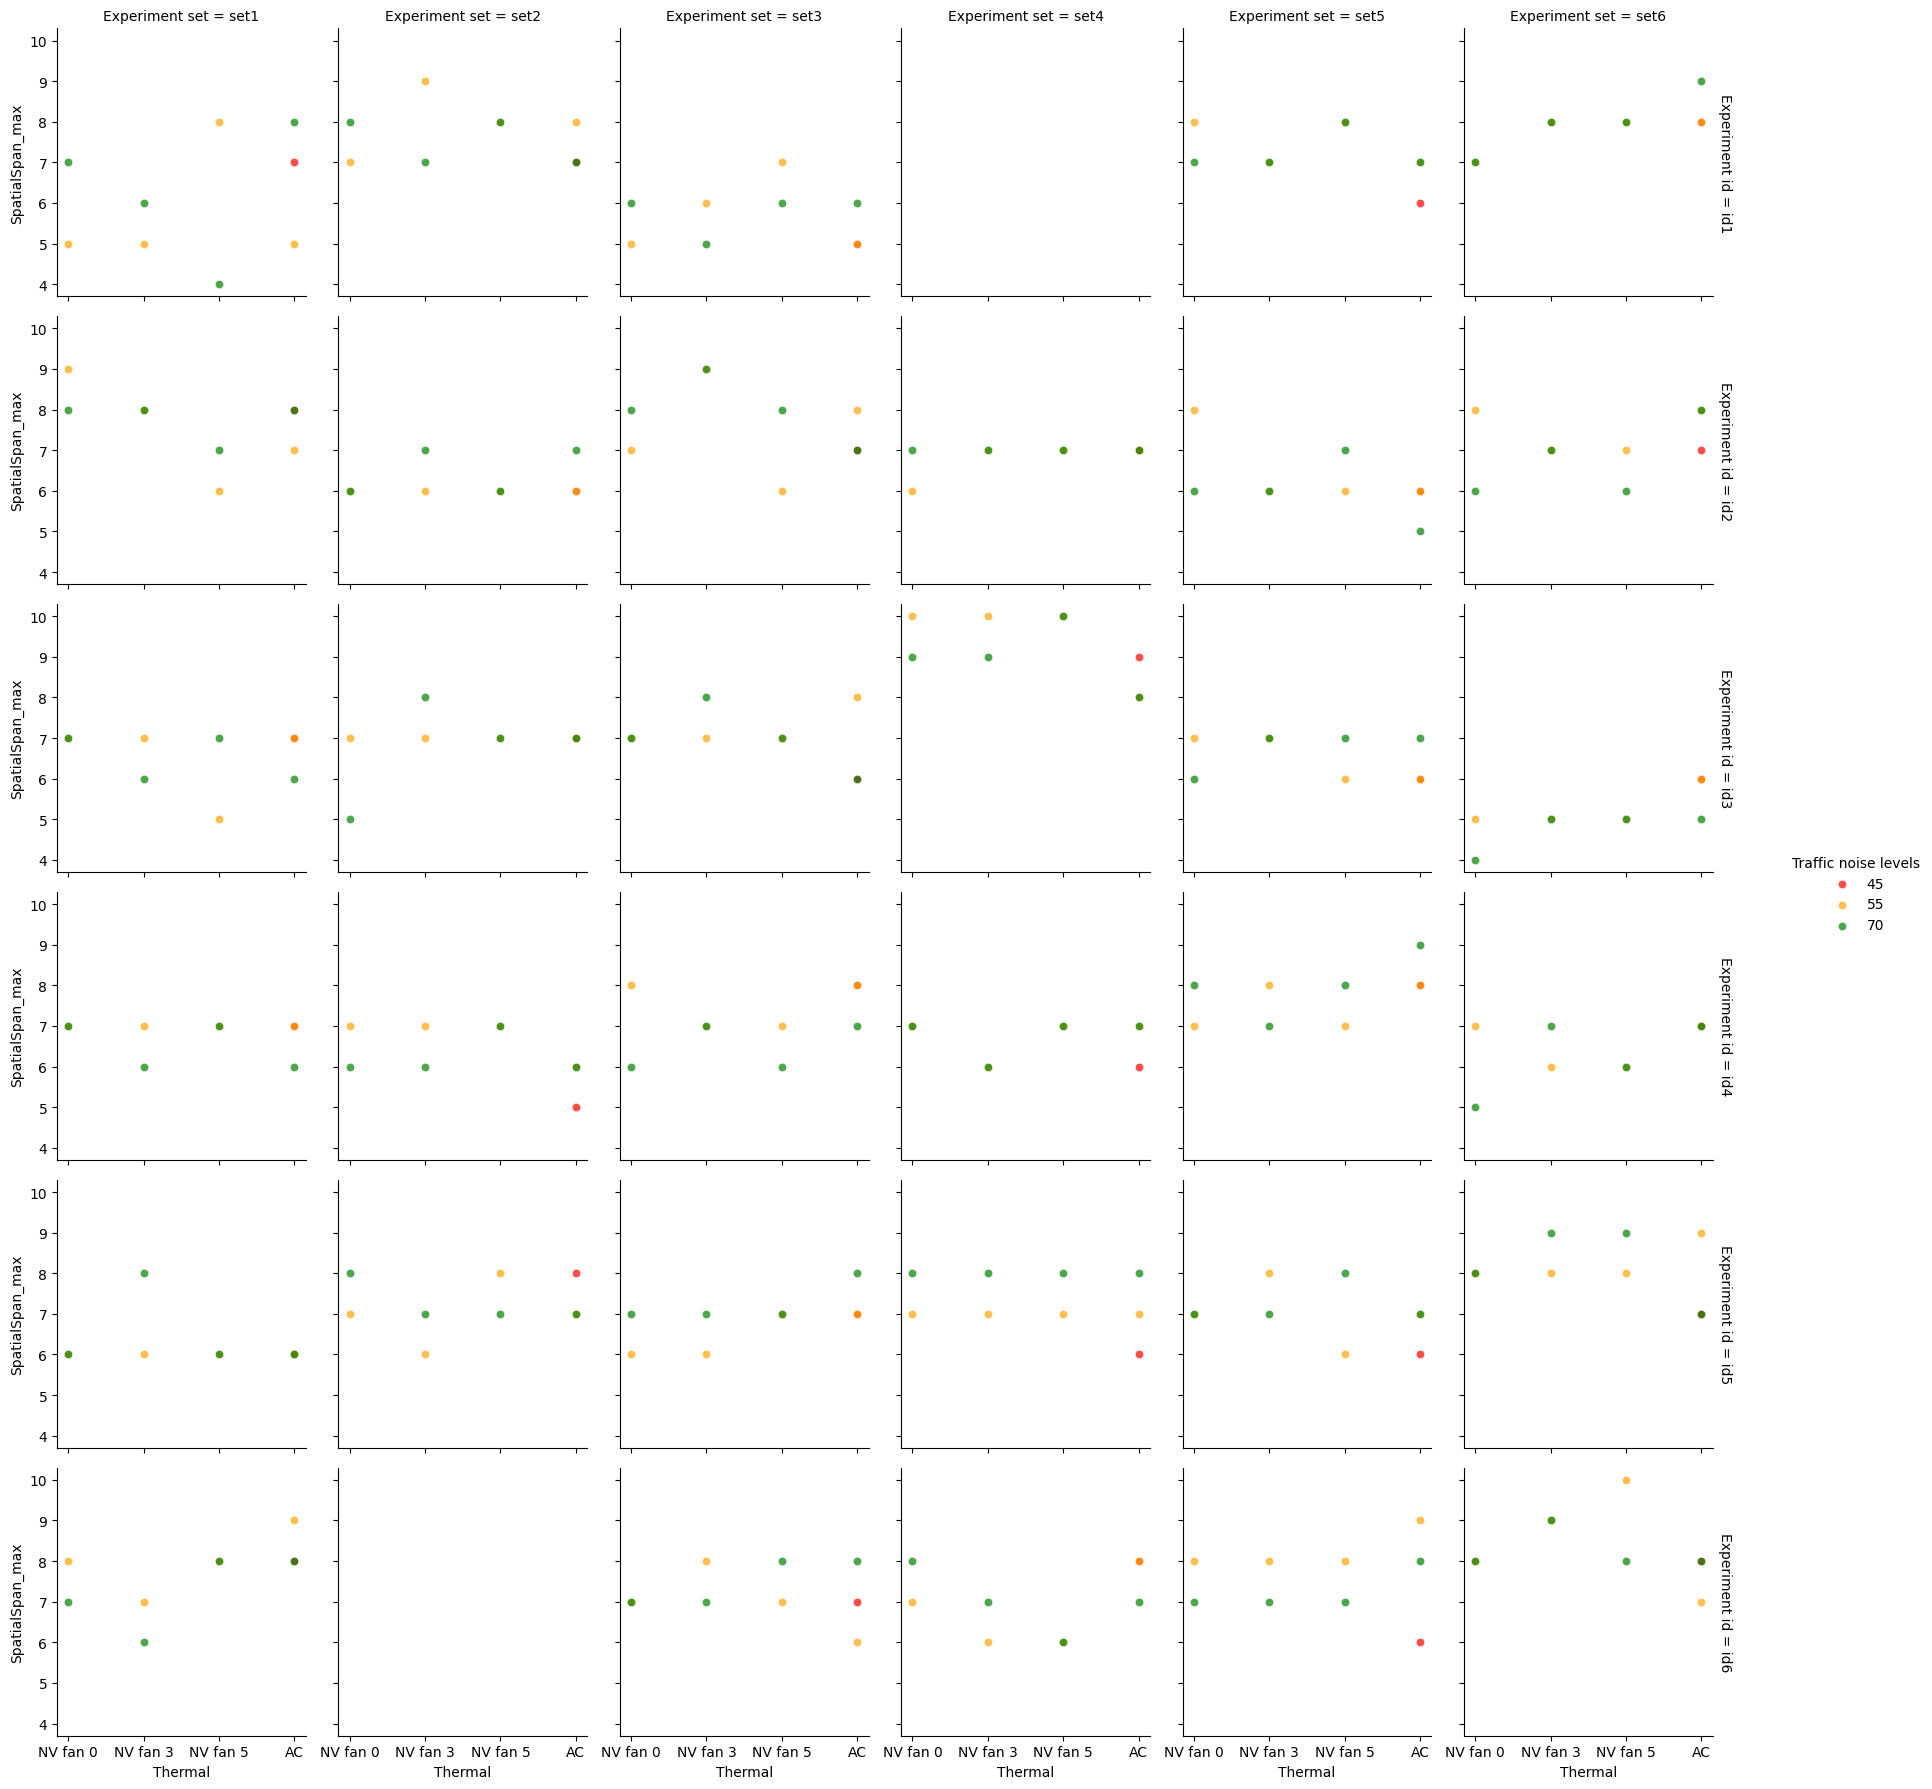

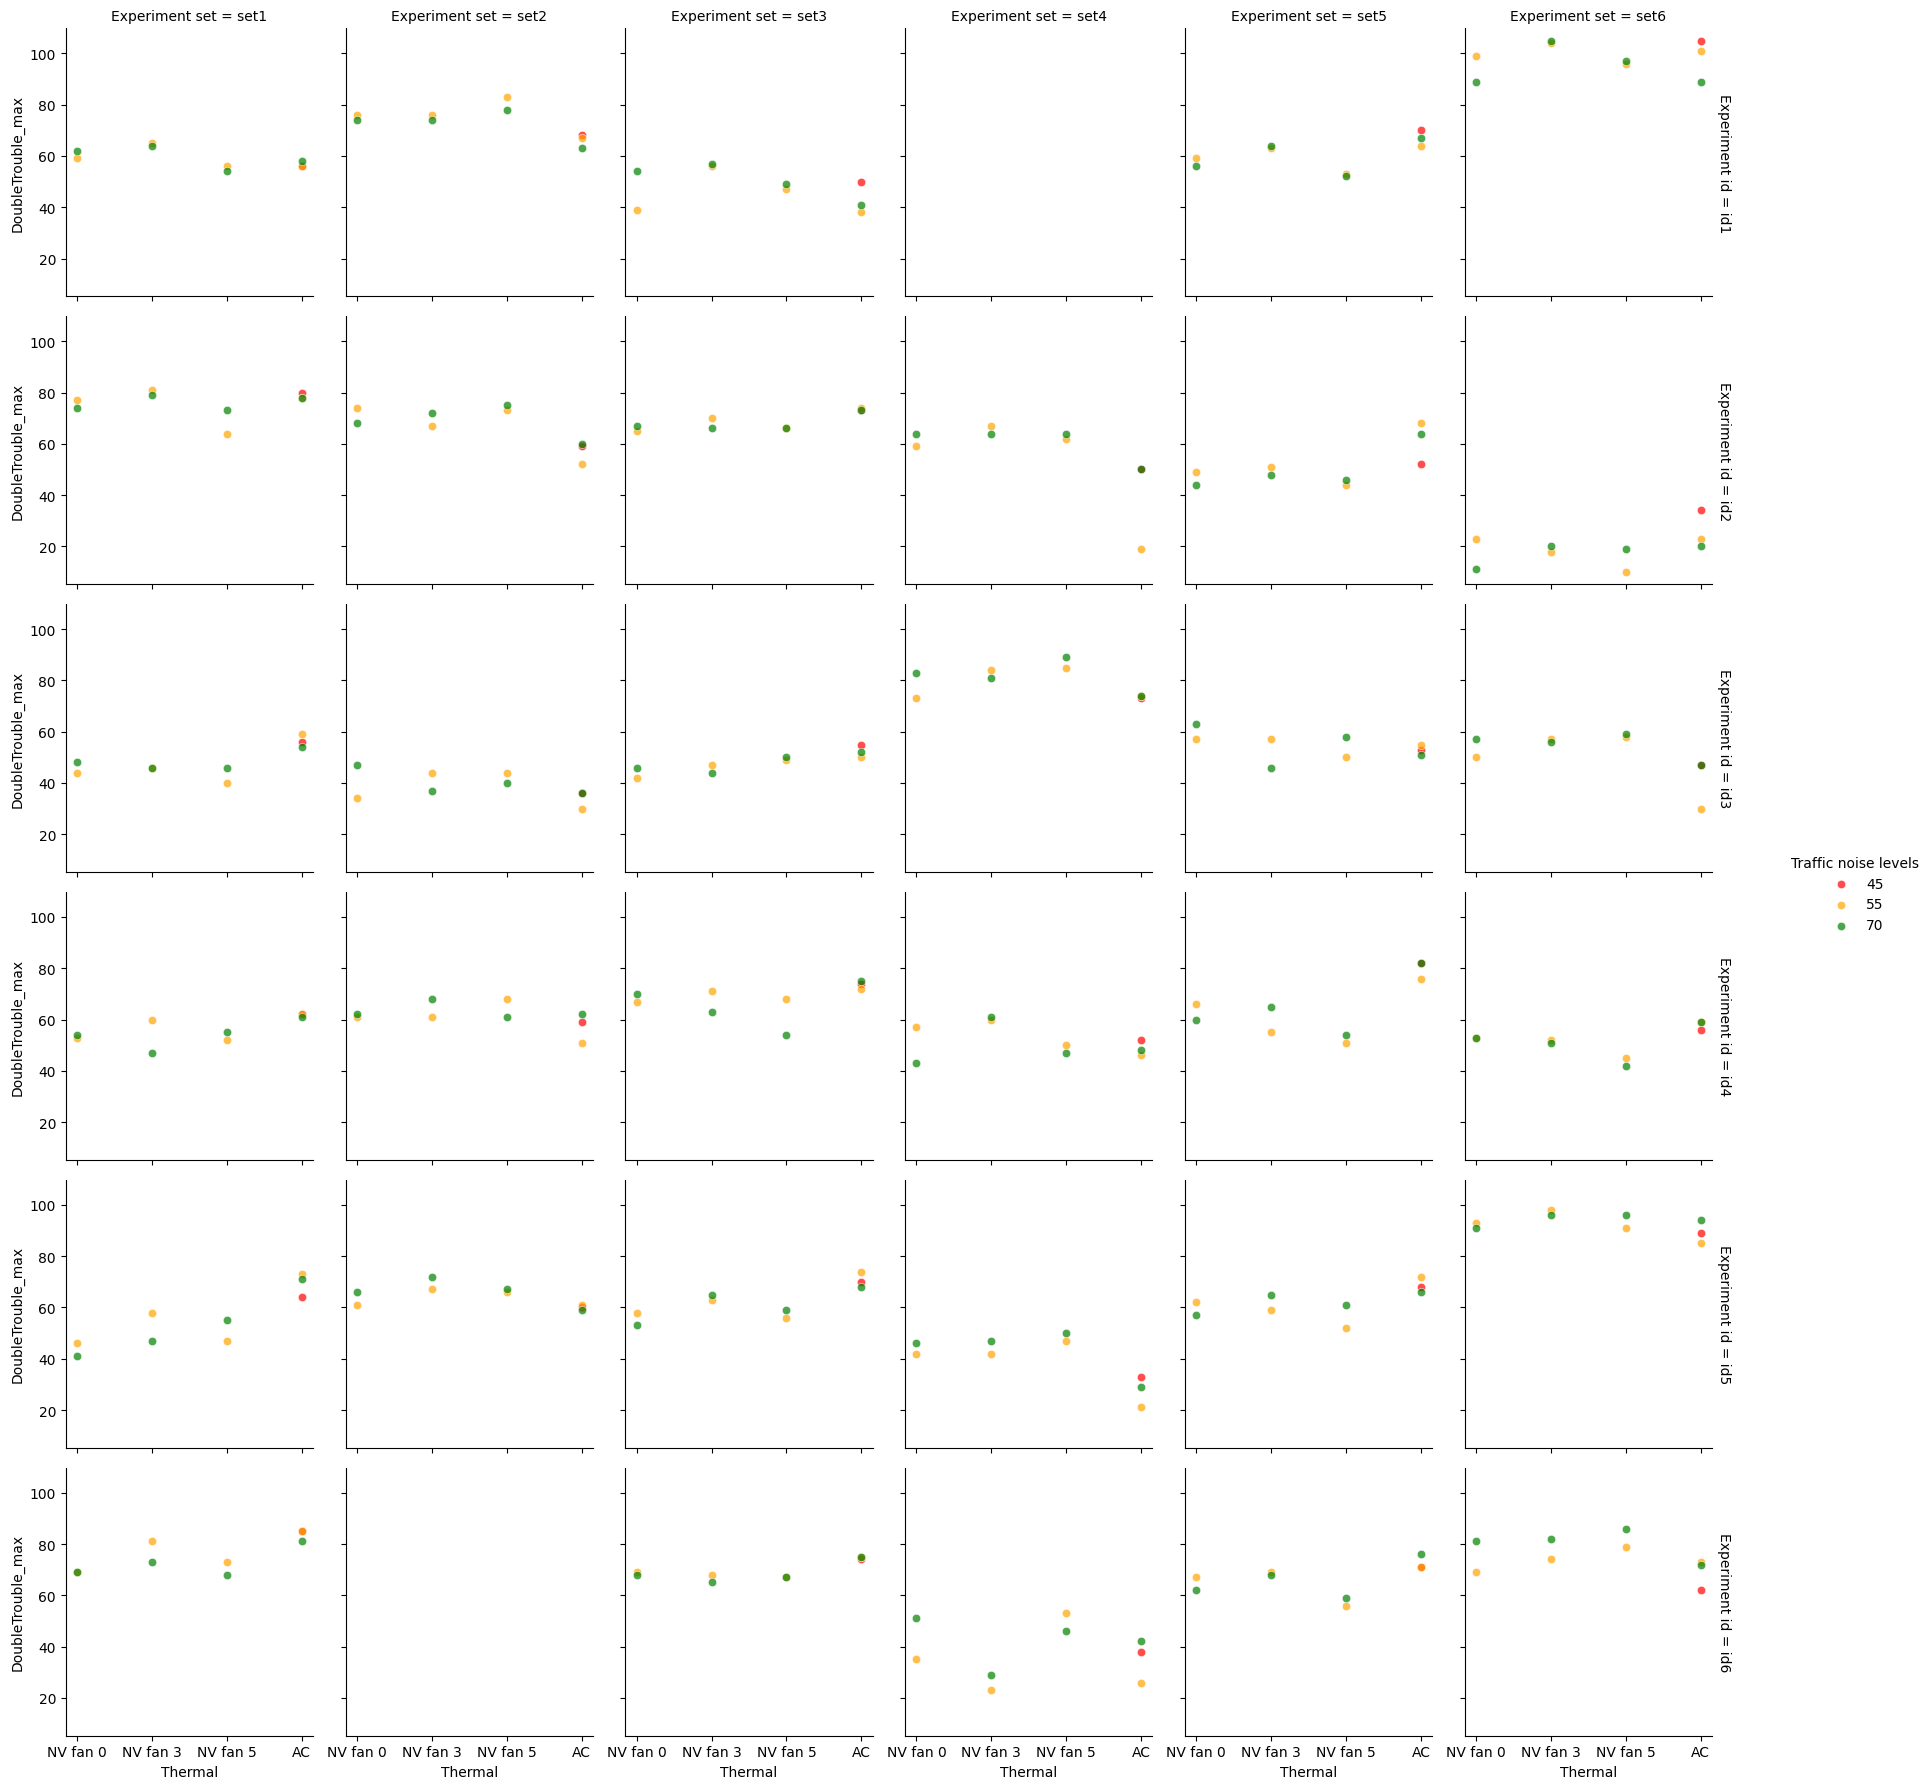

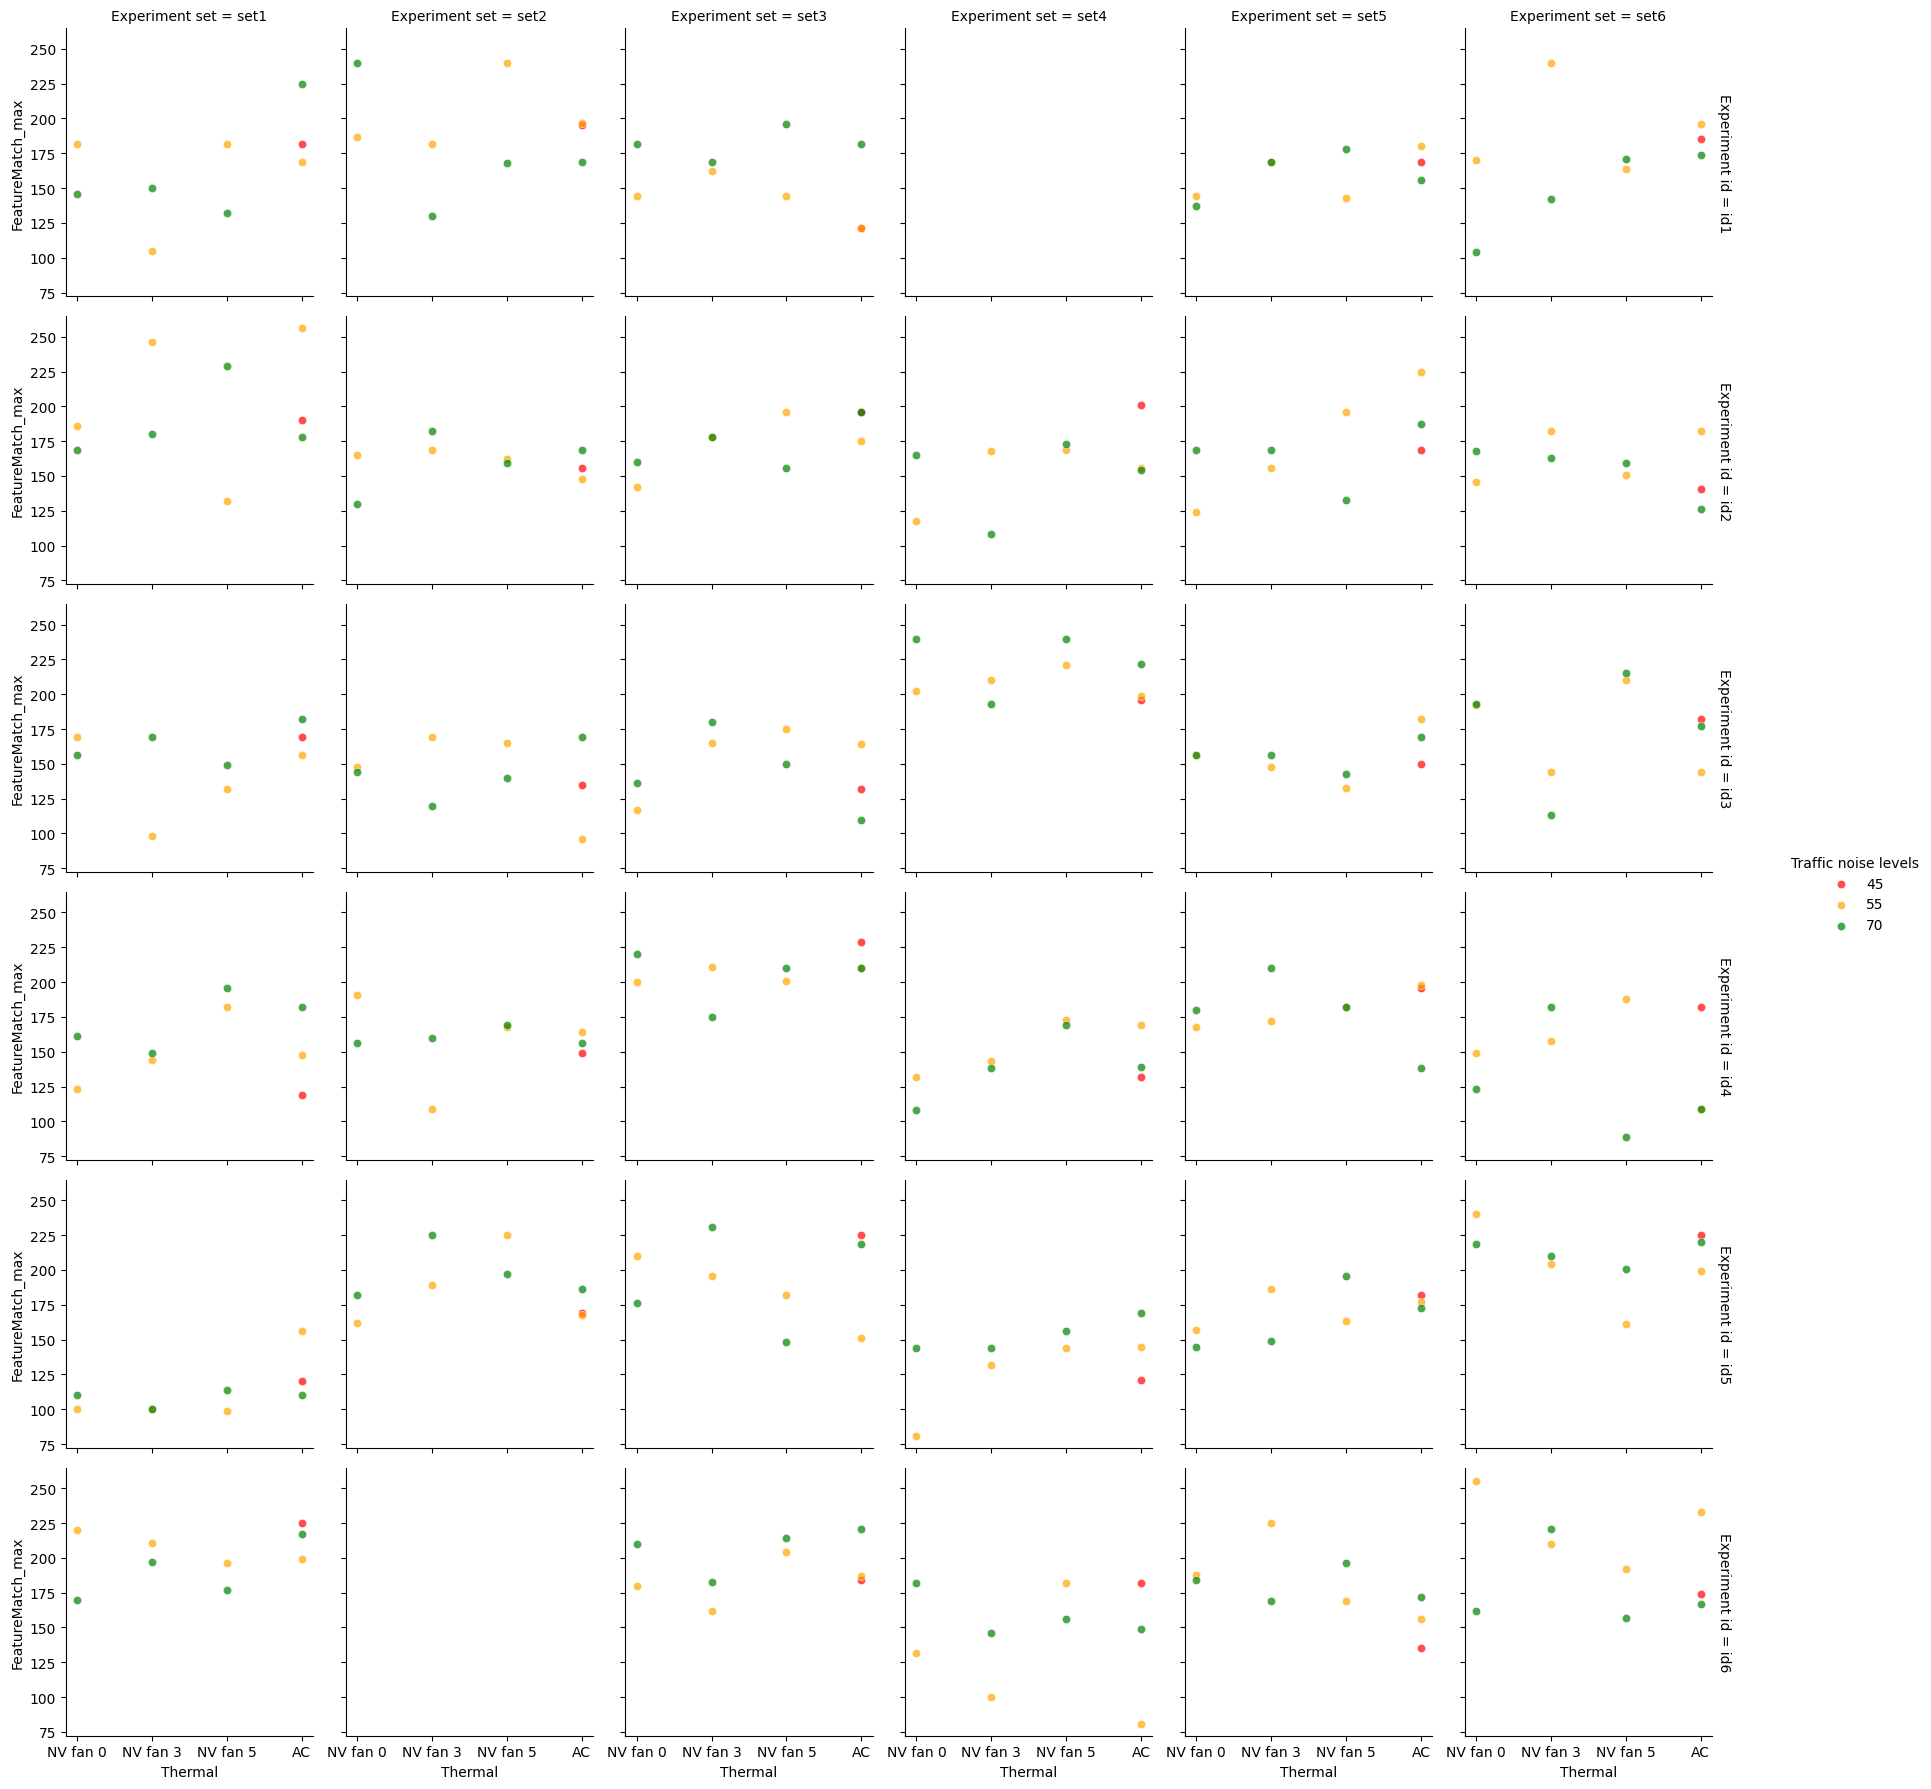

In [46]:
ordered_row = data_final_plot5['Experiment id'].value_counts().index.sort_values()
ordered_col = data_final_plot5['Experiment set'].value_counts().index.sort_values()
for item in sb_y:
    g = sns.FacetGrid(data_final_plot5, col="Experiment set", row="Experiment id", hue="Traffic noise levels", margin_titles=True, row_order=ordered_row, col_order=ordered_col, palette=sns.color_palette(['red','orange','green','blue']),)
    g.map(sns.scatterplot, "Thermal", item, alpha=.7)
    g.add_legend()

# HR Plot

In [55]:
from datetime import datetime
# loading data master
set_ = [1,2,3,4,5,6]
id_ = [1,2,3,4,5,6]

data_HR = pd.DataFrame(columns=['Time','HR','RR','MS','SKINCONTACT','experiment_set','experiment_id','subid','Thermal','Traffic noise levels','Speech'])
data_V4 = pd.read_excel("../0_dataset_master/Experiment_edited_V4.xlsx")
for set in set_ :
    for id in id_:
        data = pd.read_excel(f"../8_resampleHR/HR_set{set}.xlsx", sheet_name=f'id{id}')
        data_fromV4 = data_V4[(data_V4['Experiment set']==f"set{set}") & (data_V4['Experiment id']==f"id{id}")]
        if data_fromV4.empty:
                continue
        list_of_date = []
        current_date = 0
        current_data = ""
        status = True
        counter = 0
        for ind, row in data_fromV4.iterrows():
            date = str(row["End Date"].date())
            start_clock, end_clock = row['Time_thermal'].split("-")
            start_time = date+" "+start_clock
            start_time = datetime.strptime(start_time, "%Y-%m-%d %H:%M")
            
            if status:
                list_of_date.append(start_time)
                status = False
                current_date = datetime.strptime(date, "%Y-%m-%d").day

            if datetime.strptime(date, "%Y-%m-%d").day > current_date and not status:
                list_of_date.append(current_data)
                list_of_date.append(start_time)
                current_date = datetime.strptime(date, "%Y-%m-%d").day

            end_time = date+" "+end_clock
            end_time = datetime.strptime(end_time, "%Y-%m-%d %H:%M")
            current_data = end_time

            if counter == len(list(data_fromV4.iterrows()))-1:
                list_of_date.append(end_time)
            
            counter+=1
        data = data[((data['Time']>=list_of_date[0]) & (data['Time']<=list_of_date[1])) | ((data['Time']>=list_of_date[2]) & (data['Time']<=list_of_date[3]))]
        frames = [data_HR, data]
        data_HR = pd.concat(frames)

C:\Users\ZENI\AppData\Local\Temp\ipykernel_15672\2524570577.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_HR = pd.concat(frames)
C:\Users\ZENI\AppData\Local\Temp\ipykernel_15672\2524570577.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_HR = pd.concat(frames)


In [58]:
data_HR.dropna(subset=['Thermal', 'Traffic noise levels'], inplace=True)
data_HR = data_HR[data_HR['Speech']==0]
data_HR = data_HR[data_HR['HR']>0]
data_HR = data_HR[~((data_HR['Traffic noise levels']==45) & (data_HR['HR']>130))]

c:\Users\ZENI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ZENI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ZENI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\ZENI\AppData\Local\Programs\Python\Python310\l

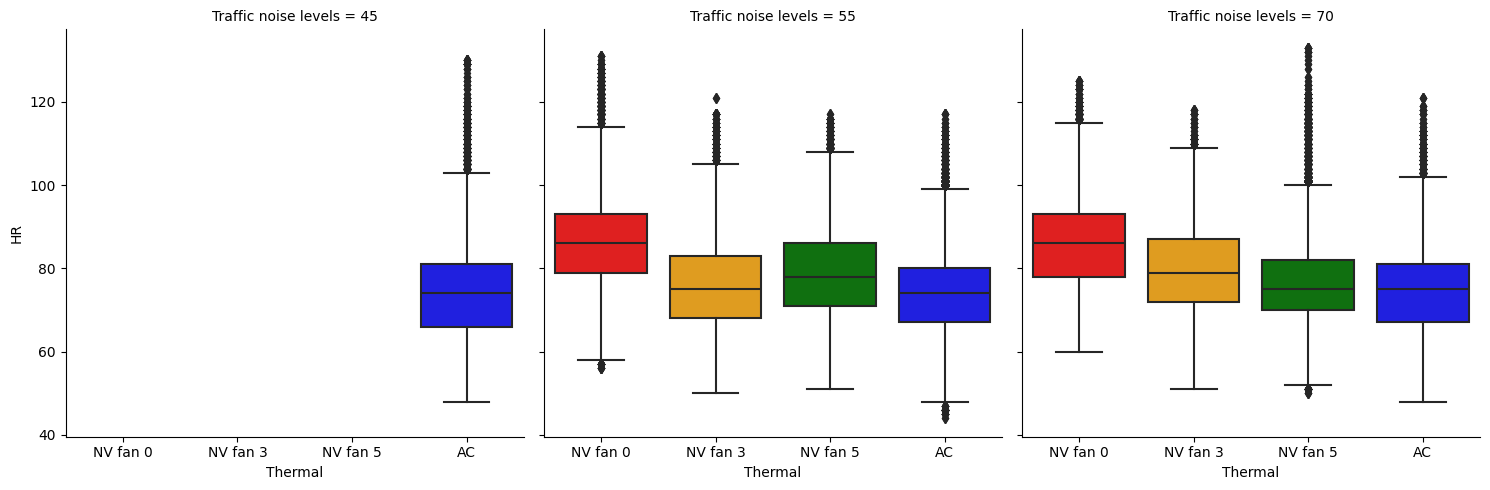

In [59]:
data_HR['Thermal'] = pd.Categorical(data_HR['Thermal'],["NV fan 0", "NV fan 3", "NV fan 5", "AC"])
data_HR.sort_values('Thermal', inplace=True)
data_HR.reset_index(inplace=True)
sns.catplot(
    data=data_HR, 
    x='Thermal', 
    y="HR",
    col='Traffic noise levels', kind='box', col_wrap=3,
    palette=sns.color_palette(['red','orange','green','blue']),
)

# SkinT Plot

In [51]:
# loading data master
from datetime import datetime

set_ = [1,2,3,4,5,6]
id_ = [1,2,3,4,5,6]

date = {
    1:[10,11],
    2:[12,13],
    3:[17,18],
    4:[19,20],
    5:[24,25],
    6:[26,27]
}

data_SkinT = pd.DataFrame(columns=['Time','Unit','1','2','3','4','Tmsk','experiment_set','experiment_id','subid','Thermal','Traffic noise levels','Speech'])
data_V4 = pd.read_excel("../0_dataset_master/Experiment_edited_V4.xlsx")
try:
    for set in set_ :
        for id in id_:
            data = pd.read_excel(f"../7_resampleIntoEachSet/SkinT_set{set}_adjustment.xlsx", sheet_name=f'idid{id}')
            data_fromV4 = data_V4[(data_V4['Experiment set']==f"set{set}") & (data_V4['Experiment id']==f"id{id}")]
            if data_fromV4.empty:
                continue
            list_of_date = []
            current_date = 0
            current_data = ""
            status = True
            counter = 0
            for ind, row in data_fromV4.iterrows():
                date = str(row["End Date"].date())
                start_clock, end_clock = row['Time_thermal'].split("-")
                start_time = date+" "+start_clock
                start_time = datetime.strptime(start_time, "%Y-%m-%d %H:%M")
                
                if status:
                    list_of_date.append(start_time)
                    status = False
                    current_date = datetime.strptime(date, "%Y-%m-%d").day

                if datetime.strptime(date, "%Y-%m-%d").day > current_date and not status:
                    list_of_date.append(current_data)
                    list_of_date.append(start_time)
                    current_date = datetime.strptime(date, "%Y-%m-%d").day

                end_time = date+" "+end_clock
                end_time = datetime.strptime(end_time, "%Y-%m-%d %H:%M")
                current_data = end_time

                if counter == len(list(data_fromV4.iterrows()))-1:
                    list_of_date.append(end_time)
                
                counter+=1
            data = data[((data['Time']>=list_of_date[0]) & (data['Time']<=list_of_date[1])) | ((data['Time']>=list_of_date[2]) & (data['Time']<=list_of_date[3]))]
            frames = [data_SkinT, data]
            data_SkinT = pd.concat(frames)
except ValueError as e:
    print(e)
    print(set, id)
except IndexError as e:
    print(e)
    print(set, id)
data_SkinT.dropna(subset=['Thermal', 'Traffic noise levels'], inplace=True)
data_SkinT = data_SkinT[data_SkinT['Speech']==0]

C:\Users\ZENI\AppData\Local\Temp\ipykernel_15672\3383596168.py:56: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_SkinT = pd.concat(frames)
C:\Users\ZENI\AppData\Local\Temp\ipykernel_15672\3383596168.py:56: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_SkinT = pd.concat(frames)
C:\Users\ZENI\AppData\Local\Temp\ipykernel_15672\3383596168.py:56: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclu

c:\Users\ZENI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ZENI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ZENI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\ZENI\AppData\Local\Programs\Python\Python310\l

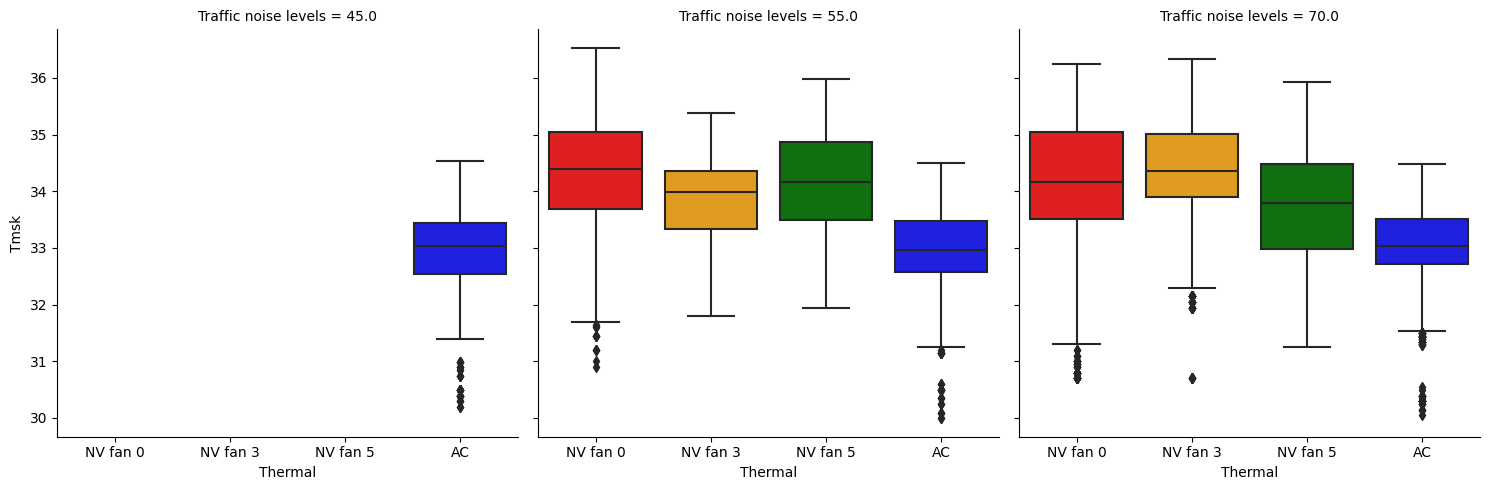

In [52]:
data_SkinT['Thermal'] = pd.Categorical(data_SkinT['Thermal'],["NV fan 0", "NV fan 3", "NV fan 5", "AC"])
data_SkinT.sort_values('Thermal', inplace=True)
data_SkinT.reset_index(inplace=True)
sns.catplot(
    data=data_SkinT, 
    x='Thermal', 
    y="Tmsk",
    col='Traffic noise levels', kind='box', col_wrap=3,
    palette=sns.color_palette(['red','orange','green','blue']),
)